나이브 베이즈(Naive Bayes) : 스팸 여부 판단하기

목표: 문자 데이터셋을 이용해 스팸 여부를 판단

via 최효원's Jupyter Notebook

스팸 문자에 대한 데이터로, 독립변수는 text 하나밖에 없는 데이터셋입니다.
문장에 사용된 단어를 사용 빈도로 구분해 스팸 여부를 판단하기 위한 작업을 진행했습니다.

독립변수의 종류가 매우 많고, 자연어 처리에 가장 적합한 나이브 베이즈 알고리즘을 활용해
해당 분석 및 스팸 여부 판단 작업을 수행했습니다.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('https://media.githubusercontent.com/media/musthave-ML10/data_source/main/spam.csv')
#데이터 출처 : https://media.githubusercontent.com/media/musthave-ML10
df.head()
#target : 종속변수, 스팸인지 아닌지 정보가 들어있음 #text : 독립변수, 스팸 여부를 판별하는데 사용할 문자열

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [2]:
df.info()
#total : 5574 rows / 2 cols

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5574 non-null   object
 1   text    5574 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [68]:
df['target'].unique()
#종속 변수 고윳값은 총 두개 - ham(스팸이 아닌 문자), spam(스팸 문자)

array(['ham', 'spam'], dtype=object)

*자연어를 처리할 때, 데이터의 기준은 단어가 됩니다, 따라서 쉼표 및 마침표 등의 특수 기호들은 
노이즈가 되므로 제거해야 합니다.

In [69]:
import string
#python 특수 기호 목록 라이브러리 import

string.punctuation
#특수 기호 목록 출력

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [70]:
sample_string = df['text'].loc[0]
sample_string
#문자열 선택(연습)

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [71]:
for i in sample_string:
    if i not in string.punctuation:
        print(i)
#문자열의 문자를 하나씩 출력

G
o
 
u
n
t
i
l
 
j
u
r
o
n
g
 
p
o
i
n
t
 
c
r
a
z
y
 
A
v
a
i
l
a
b
l
e
 
o
n
l
y
 
i
n
 
b
u
g
i
s
 
n
 
g
r
e
a
t
 
w
o
r
l
d
 
l
a
 
e
 
b
u
f
f
e
t
 
C
i
n
e
 
t
h
e
r
e
 
g
o
t
 
a
m
o
r
e
 
w
a
t


In [72]:
new_string = []
for i in sample_string:
    #문자열 순회
    if i not in string.punctuation:
        #특수 기호가 아니면,
        new_string.append(i)
        #리스트에 문자 추가
new_string = ''.join(new_string)
#리스트를 문자열 형태로 전환

In [73]:
new_string

'Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat'

*데이터 전체 행에 적용하기 위한 함수를 만드는 작업을 진행했습니다.

In [74]:
#함수 생성
def remove(x):
    new_string = []
    for i in x:
        #순회
        if i not in string.punctuation:
            new_string.append(i)
    new_string = ''.join(new_string)
    return new_string
#반환

In [75]:
remove(sample_string)

'Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat'

In [76]:
data = pd.Series([[1,2],[3,4,5]])
def check_len(x):
    return len(x)
data.apply(check_len)

0    2
1    3
dtype: int64

In [77]:
df.text = df.text.apply(remove)
#생성한 함수로 데이터셋 전체 update

*특수 기호 전처리 후, 불용어(stopword) 제거 작업을 진행했습니다.
불용어는 자연어 분석에 큰 도움이 안되는 단어를 의미합니다.
판다스 시리즈에 저장된 문자열 하나를 단어 단위 리스트 변환 ->
불용어가 아니면 소문자로 저장, ->
문자를 문자열로 합침 ->
반복

In [78]:
import nltk
#import
nltk.download('stopwords')
#불용어 목록 가져오기

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hyosasiburi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [79]:
from nltk.corpus import stopwords
#불용어 목록 import

In [80]:
stopwords.words('english')
#영어 불용어 선택

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [81]:
sample_string2 = 'This is not - SPAM'

In [82]:
sample_string2.split('-')

['This is not ', ' SPAM']

In [83]:
sample_string = df['text'].loc[0]
sample_string.split()
#단어 단위로 문장 분할

['Go',
 'until',
 'jurong',
 'point',
 'crazy',
 'Available',
 'only',
 'in',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'Cine',
 'there',
 'got',
 'amore',
 'wat']

In [85]:
#불용어 제거 함수 생성
def stop(x):
    new_string = []
    #새 리스트 생성
    for i in x.split():
        #문자 순회
        if i.lower() not in stopwords.words('english'):
            #소문자로 변환한 단어가 불용어가 아니면,
            new_string.append(i.lower())
            #문자 단위로 추가
    new_string = ' '.join(new_string)
    #공백 단위로 묶기
    return new_string
#반환

df['text'] = df['text'].apply(stop)
#텍스트에 stop 함수 적용
df['text']

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry 2 wkly comp win fa cup final tkts 2...
3                     u dun say early hor u c already say
4             nah dont think goes usf lives around though
                              ...                        
5569    2nd time tried 2 contact u u £750 pound prize ...
5570                          ü b going esplanade fr home
5571                          pity mood soany suggestions
5572    guy bitching acted like id interested buying s...
5573                                       rofl true name
Name: text, Length: 5574, dtype: object

In [86]:
sample1 = pd.Series(['a','b','c'])
sample1.map({'a': 'apple', 'b':'banana', 'c':'cherry'})

0     apple
1    banana
2    cherry
dtype: object

*타겟 변수에서 문자 형식의 데이터도 모델링에 에러를 유발하지는 않지만,
숫자로 변환하는 작업을 진행했습니다.

In [87]:
#spam 이면 1, 아니면 0
df['target'] = df['target'].map({'spam':1, 'ham':0})
df['target']

0       0
1       0
2       1
3       0
4       0
       ..
5569    1
5570    0
5571    0
5572    0
5573    0
Name: target, Length: 5574, dtype: int64

In [88]:
x = df['text']
#독립변수
y = df['target']
#종속변수

*데이터 전체에 존재하는 모든 단어를 사전처럼 모은 뒤에,
인덱스를 부여하고 문장마다 속한 단어가 있는 인덱스를 카운트 할 수 있게끔,
library 를 import 해서 문자를 카운트 기반으로 벡터화를 진행했습니다.

In [89]:
from sklearn.feature_extraction.text import CountVectorizer
#import

In [90]:
cv = CountVectorizer()
cv.fit(x)
#독립변수 카운트벡터 학습
cv.vocabulary_
#단어 및 인덱스 출력

{'go': 3791,
 'jurong': 4687,
 'point': 6433,
 'crazy': 2497,
 'available': 1414,
 'bugis': 1881,
 'great': 3888,
 'world': 9184,
 'la': 4847,
 'buffet': 1879,
 'cine': 2214,
 'got': 3848,
 'amore': 1181,
 'wat': 8947,
 'ok': 5995,
 'lar': 4886,
 'joking': 4655,
 'wif': 9079,
 'oni': 6027,
 'free': 3577,
 'entry': 3160,
 'wkly': 9136,
 'comp': 2330,
 'win': 9093,
 'fa': 3296,
 'cup': 2553,
 'final': 3421,
 'tkts': 8380,
 '21st': 454,
 'may': 5335,
 '2005': 441,
 'text': 8217,
 '87121': 875,
 'receive': 6833,
 'questionstd': 6724,
 'txt': 8592,
 'ratetcs': 6776,
 'apply': 1267,
 '08452810075over18s': 71,
 'dun': 3011,
 'say': 7192,
 'early': 3031,
 'hor': 4222,
 'already': 1154,
 'nah': 5682,
 'dont': 2918,
 'think': 8291,
 'goes': 3805,
 'usf': 8741,
 'lives': 5050,
 'around': 1318,
 'though': 8310,
 'freemsg': 3585,
 'hey': 4118,
 'darling': 2617,
 'weeks': 9002,
 'word': 9170,
 'back': 1464,
 'id': 4343,
 'like': 5000,
 'fun': 3652,
 'still': 7860,
 'tb': 8147,
 'xxx': 9309,
 'std': 

In [91]:
x = cv.transform(x)
#카운트 벡터 변환
print(x)
#format : (데이터의 행 번호, 단어의 index 값) 해당 행에서 출현 횟수

  (0, 1181)	1
  (0, 1414)	1
  (0, 1879)	1
  (0, 1881)	1
  (0, 2214)	1
  (0, 2497)	1
  (0, 3791)	1
  (0, 3848)	1
  (0, 3888)	1
  (0, 4687)	1
  (0, 4847)	1
  (0, 6433)	1
  (0, 8947)	1
  (0, 9184)	1
  (1, 4655)	1
  (1, 4886)	1
  (1, 5995)	1
  (1, 6027)	1
  (1, 9079)	1
  (2, 71)	1
  (2, 441)	1
  (2, 454)	1
  (2, 875)	1
  (2, 1267)	1
  (2, 2330)	1
  :	:
  (5570, 3188)	1
  (5570, 3564)	1
  (5570, 3810)	1
  (5570, 4188)	1
  (5571, 5566)	1
  (5571, 6359)	1
  (5571, 7611)	1
  (5571, 7986)	1
  (5572, 999)	1
  (5572, 1665)	1
  (5572, 1916)	1
  (5572, 3103)	1
  (5572, 3577)	1
  (5572, 3701)	1
  (5572, 3950)	1
  (5572, 4343)	1
  (5572, 4480)	1
  (5572, 5000)	1
  (5572, 5777)	1
  (5572, 7636)	1
  (5572, 8731)	1
  (5572, 8997)	1
  (5573, 5688)	1
  (5573, 7052)	1
  (5573, 8538)	1


In [93]:
df['text'].loc[0]

'go jurong point crazy available bugis n great world la e buffet cine got amore wat'

In [94]:
print(cv.vocabulary_['go'])
print(cv.vocabulary_['jurong'])
print(cv.vocabulary_['point'])

3791
4687
6433


In [95]:
from sklearn.model_selection import train_test_split
#학습, 테스트 데이터셋 분할

xtr,xt,ytr,yt = train_test_split(x,y, test_size = 0.2, random_state = 100)

In [96]:
from sklearn.naive_bayes import MultinomialNB
#다항 분포에 대한 나이브 베이즈 알고리즘 import
nb = MultinomialNB()
nb.fit(xtr,ytr)
#학습
pred = nb.predict(xt)
#에측

In [97]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_score(yt, pred)
#정확도 계산

0.9856502242152466

*최종 정확도 약 99%의 스팸 여부를 판단할 수 있는 모델을 생성했습니다.

In [99]:
print(confusion_matrix(yt, pred))
#혼동 행렬 출력

[[965  12]
 [  4 134]]


<AxesSubplot:>

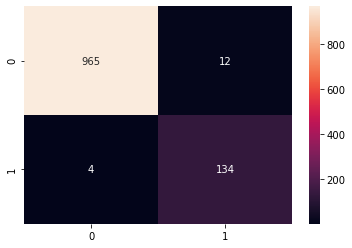

In [100]:
sns.heatmap(confusion_matrix(yt,pred), annot = True, fmt = '.0f')
#혼동 행렬 heatmap

*실젯값이 ham(0), 예측값도 0 인 경우는 965건(TN), 실젯값이 spam(1), 예측값도 1 인 경우는 134건(TP)
1 인데 0으로 잘못 예측된 경우는 4건(2종 오류, FN), 0인데 1로 잘못 예측된 경우는 총 12건(1종 오류, FP) 으로 확인됐습니다.